## Описание данных
**ads_data.csv** – данные взаимодействий с рекламными объявлениями

* date – дата
* time – время
* event – действие (просмотр/клик)
* platform – платформа
* ad_id – id объявления
* client_union_id – id рекламного кабинета
* campaign_union_id – id рекламной кампании
* ad_cost_type – тип оплаты
* ad_cost – цена
* has_video – есть ли видео
* target_audience_count – размер аудитории

**ads_clients_data.csv** – характеристики рекламных клиентов

* date – дата
* client_union_id – id рекламного кабинета
* community_id – id сообщества
* create_date – дата создания рекламного клиента

In [2]:
import pandas as pd

In [3]:
ads_data = pd.read_csv('ads_data.csv',\
            parse_dates=['date', 'time'])
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [4]:
ads_clients_data = pd.read_csv('ads_clients_data.csv',\
            parse_dates=['date', 'create_date'])
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


### Задание 1

Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

*Могут понадобиться: pivot(), fillna()*

In [5]:
event_count = ads_data.groupby(['ad_id', 'event'], as_index=False).size()
event_count.head()

,ad_id,event,size
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [6]:
event_pivot = event_count.pivot(index='ad_id', columns='event', values='size')
event_pivot.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,NaN,35.0
2132,1.0,58.0


In [7]:
event_pivot.fillna(0).mean()

event
click    113.137824
view     923.131606
dtype: float64

- Среднее количество кликов на объявление - 113
- Среднее количество показов на объявление - 923

### Задание 2

Нарисуйте график распределения показов на объявление за весь период

In [8]:
ads_data.loc[ads_data['event'] == 'view']['ad_id'].value_counts().head()

112583    351802
107729    184596
107837     51996
28142      24152
45008      19668
Name: ad_id, dtype: int64

In [9]:
import numpy as np

In [10]:
log_views = np.log(ads_data.loc[ads_data['event'] == 'view']['ad_id'].value_counts())
log_views.head()

112583    12.770824
107729    12.125925
107837    10.858922
28142     10.092122
45008      9.886748
Name: ad_id, dtype: float64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ad_id', ylabel='Density'>

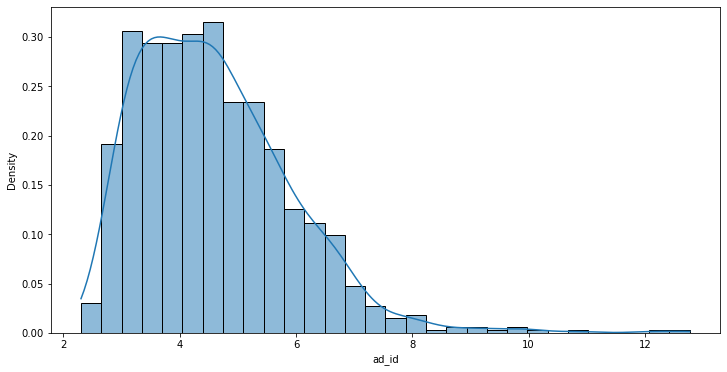

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=log_views, kde=True, stat='density', ax=ax)

### Задание 3

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента

Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа

*Могут пригодиться: pivot(), скользящее среднее*

In [13]:
daily_ad_views = ads_data.loc[ads_data['event'] == 'view'].\
    pivot_table(index='ad_id',
                columns='date',
                values='time', 
                aggfunc='count')
daily_ad_views.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [14]:
mean_views = daily_ad_views.mean()
mean_views.head()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
dtype: float64

In [15]:
rolling_daily = daily_ad_views.mean().rolling(window=2).mean().round()
rolling_daily.head()

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
dtype: float64

In [16]:
print(f" Ответ: {round(rolling_daily['2019-04-06'])}")

 Ответ: 598


### Задание 4

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании)

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

*Пример ответа: 2020-12-31*

*Могут пригодиться: sns.lineplot(), скользящее среднее, значение по модулю*

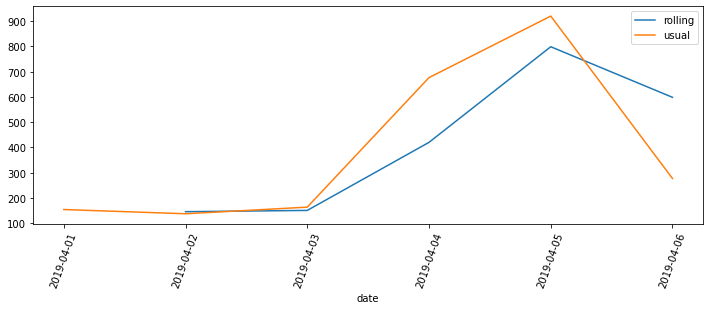

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(data=rolling_daily, ax=ax, label='rolling')
sns.lineplot(data=mean_views, ax=ax, label='usual')
ax.tick_params(axis='x', rotation=70)
plt.legend()

### Задание 5

Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date)

В качестве ответа укажите среднее число дней

In [18]:
merged = ads_clients_data.merge(ads_data,\
                                on=['client_union_id'],\
                                suffixes=('_clients_data', '_ad_data'))
merged.head()

,date_clients_data,client_union_id,community_id,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [19]:
merged['difference'] = merged['date_ad_data'] - merged['create_date']

first_ad = merged.groupby('client_union_id')['difference'].min()
first_ad.head()

client_union_id
1     98 days
9    114 days
13    66 days
16   105 days
20    32 days
Name: difference, dtype: timedelta64[ns]

In [20]:
first_ad.mean()

Timedelta('124 days 09:04:43.532219570')

In [21]:
print(f"Ответ: {first_ad.mean().days}")

Ответ: 124


### Задание 6

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней

*Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна: 50/1000 * 100 = 5%*

*Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day'))*

*Ответ дайте в процентах и округлите до сотых. Пример ответа: 34.69*

In [22]:
treshold = pd.Timedelta(365, unit='day')
lt_365 = first_ad.loc[first_ad < treshold]
lt_365.head()

client_union_id
1     98 days
9    114 days
13    66 days
16   105 days
20    32 days
Name: difference, dtype: timedelta64[ns]

In [23]:
round(len(lt_365) / ads_clients_data['client_union_id'].nunique() * 100, 2)

0.69

Ответ: 0.69

### Задание 7

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta()

*Могут пригодиться: pd.cut(), value_counts()*

In [24]:
bins = [pd.Timedelta(x, 'd') for x in [0, 30, 90, 180, 365]]
bins

[Timedelta('0 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('180 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [25]:
labels = ['0 - 30', '30 - 90', '90 - 180', '180 - 365']

In [26]:
binned_first = pd.cut(first_ad, bins, labels=labels)
binned_first.value_counts()

90 - 180     396
30 - 90      263
180 - 365    168
0 - 30        11
Name: difference, dtype: int64

Ответ: 11

### Задание 8

И последнее задание: постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления)

In [27]:
import plotly.express as px

px.bar(binned_first.value_counts())